<h1>ML_Pattern_Classification project | Main File</h1>


In [9]:
# import BirdsData from BirdExplore
from BirdExplore import BirdsData
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


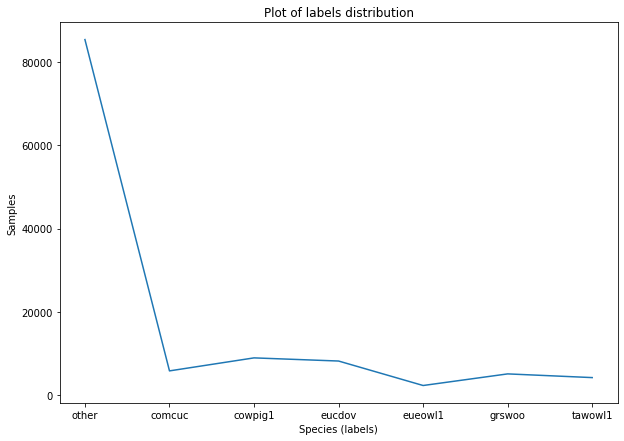

[85358, 5833, 8954, 8198, 2324, 5111, 4222]

In [10]:
BirdsData('ptichki').labels_distribution()


In [4]:
# def get_sound_label(species, sample,project_folder):
#     folder_path = os.path.join(project_folder, species)
#     file_list = os.listdir(folder_path)
#     for file in file_list:
#         if file.endswith('.npy'):
#             file_path = os.path.join(folder_path, sample)
#             data = np.load(f'{file_path}.npy')
#             label = np.load(f'{file_path}.labels.npy')
#             return data

# data = get_sound_label('comcuc','25627','ptichki')


<h3>Load dataset</h3>

In [3]:
united_data = BirdsData('ptichki').united_dataset()
print(united_data.shape)


(120000, 549)


In [4]:
# df = pd.DataFrame(united_data,columns=)
full_df = BirdsData('ptichki').get_dataframe()


<h4>Create correlation histogram between labels by choosing threshold to improve readability. Needs to be fixed</h4>

/var/folders/kh/g4116db97yzdbzhf4r7ykf580000gn/T/ipykernel_1928/4176591093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = full_df.corr()


KeyboardInterrupt: 

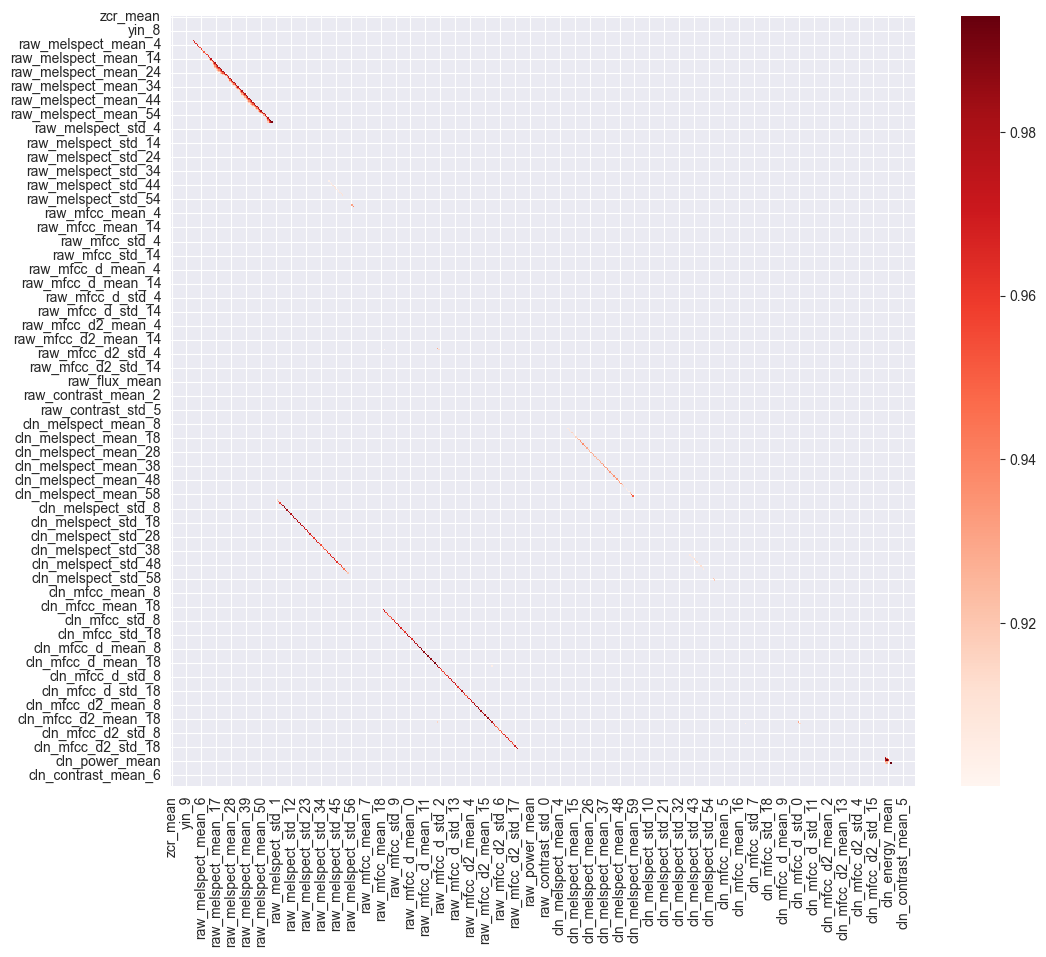

In [6]:
# corr = full_df.corr()
# threshold = 0.9
# filtered_corr = corr[(corr >= threshold) & (corr != 1.000)]
# f, ax = plt.subplots(figsize=(12, 10))
# mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(filtered_corr, annot=True, mask = mask, cmap='Reds')


<h4>Plotting MFCC for each bird species</h4>
<li>We can plot any features by chosing feature name</li>

In [7]:
def Plot_MFCC(data, target, cols, title='', plot_type='imshow'):
    filtered_data = data.loc[data['target'] == target]
    data = filtered_data[filtered_data.columns[cols]]
    plt.figure(figsize=(30, 20))
    # plt.subplot(3,1,1)
    if plot_type == 'imshow':
        plt.imshow(data.T, cmap=plt.cm.jet, aspect='auto', origin='lower')
    elif plot_type == 'scatter':
        print(f'Mean value of {title} for {target} : {data.mean()}')
        plt.plot(np.squeeze(data))
    plt.ylabel('MFCC')
    plt.xlabel('Samples')
    plt.title(title)


def find_idx_by_string(data: list, string):
    res = []
    for idx, elem in enumerate(data):
        if string in elem:
            res.append(idx)
    return res

# Plot_MFCC(full_df,'comcuc',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Comcuc MFCC')
# Plot_MFCC(full_df,'cowpig1',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Cowpig MFCC')
# Plot_MFCC(full_df,'eucdov',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Eucdow MFCC')
# Plot_MFCC(full_df,'grswoo',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Grswoo MFCC')


<h3>Plotting call/drumming duration for each species</h3>

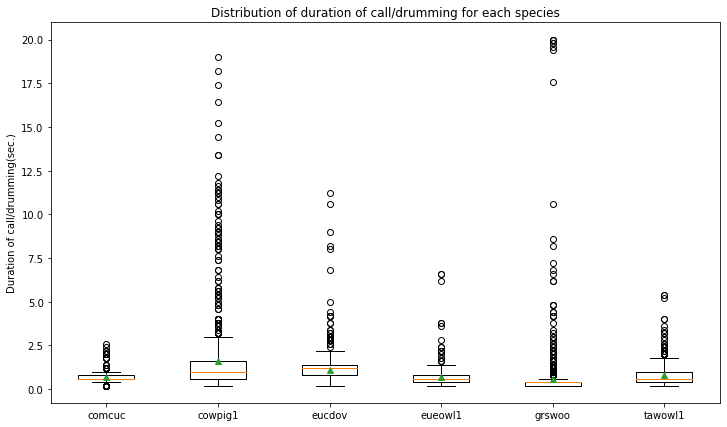

In [8]:
BirdsData('ptichki').species_call_distribution()


<h3>Use RandomForest to find most important features</h3>

In [9]:

data = full_df.drop('target', axis=1)
labels = full_df.loc[:, 'target']
print(data.shape)
print(labels.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_


(120000, 548)
(120000,)


array([0.0044276 , 0.00137005, 0.00265077, 0.00281871, 0.00324163,
       0.00212164, 0.00323648, 0.00320751, 0.00301046, 0.00402313,
       0.00288892, 0.00319383, 0.00223947, 0.00247059, 0.0024478 ,
       0.00204679, 0.00204872, 0.00200192, 0.00192307, 0.00305675,
       0.00641864, 0.00793636, 0.01299667, 0.01663037, 0.00514854,
       0.00530695, 0.00247353, 0.00191647, 0.00251735, 0.0027266 ,
       0.00252387, 0.00229332, 0.00221128, 0.0017411 , 0.00170622,
       0.00186744, 0.00191113, 0.00210614, 0.00206756, 0.00242626,
       0.00149157, 0.00130222, 0.00100507, 0.00103307, 0.00108554,
       0.0009776 , 0.00106642, 0.00098243, 0.00117557, 0.00132488,
       0.00111009, 0.00108885, 0.00094806, 0.0010124 , 0.0010022 ,
       0.00092227, 0.00087398, 0.00086395, 0.00094457, 0.00097469,
       0.00122126, 0.00144448, 0.00121056, 0.00104029, 0.00094448,
       0.00102533, 0.0010728 , 0.00110787, 0.00114936, 0.00108686,
       0.00146721, 0.00126138, 0.00145416, 0.00156523, 0.00156

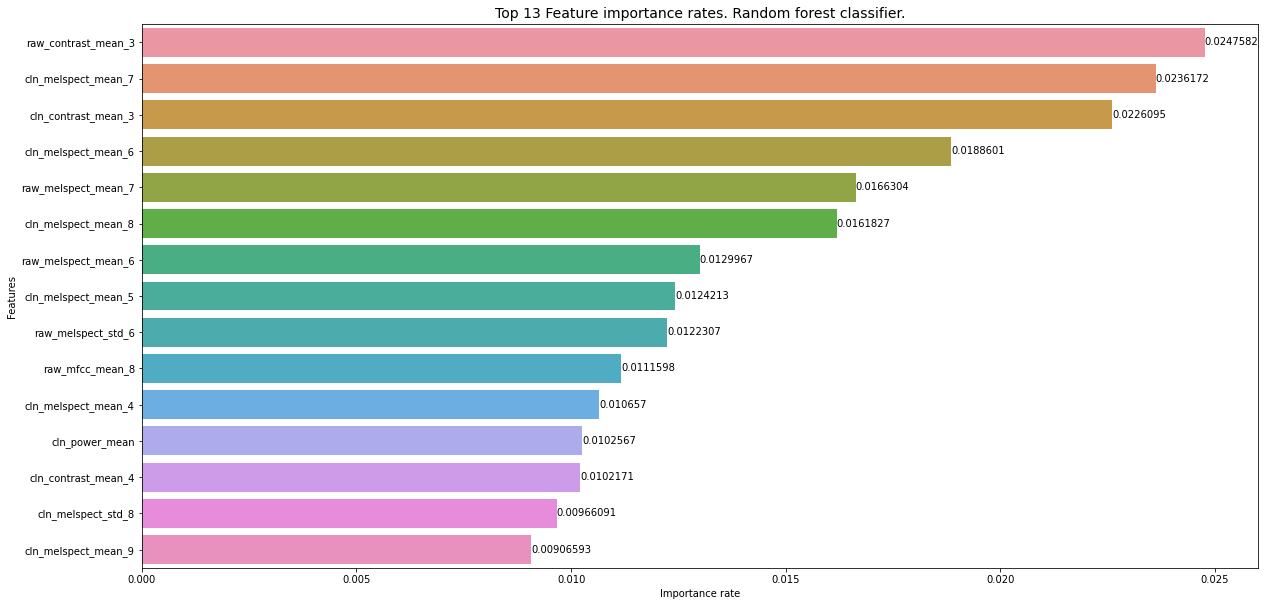

In [10]:
threshold = 0.009
importances = np.array(rf.feature_importances_)
names = np.array(rf.feature_names_in_,)

importances_filtered = np.where(importances >= threshold)[0]
features_filtered = names[importances_filtered]
importances_filtered = importances[importances_filtered]
importances_df = pd.DataFrame({"Features": features_filtered,
                               "Importance rate": importances_filtered})
importances_df.sort_values(
    by=['Importance rate'], ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.barplot(x=importances_df['Importance rate'],
                y=importances_df['Features'],
                ax=ax)
g.set_title(
    "Top 13 Feature importance rates. Random forest classifier.", fontsize=14)
for value in g.containers:
    g.bar_label(value)


<h3>Distribution of correct/incorrect species classifications by users</h3>

comcuc
cowpig1
eucdov
eueowl1
grswoo
tawowl1


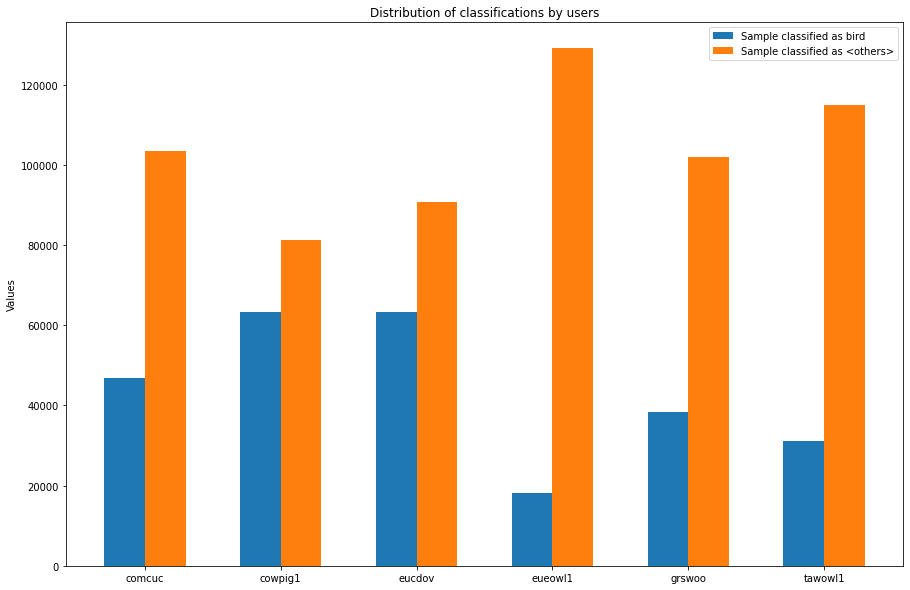

In [7]:
species = ['comcuc', 'cowpig1', 'eucdov',
           'eueowl1', 'grswoo', 'tawowl1']
positive = []
zeros = []
for elem in species:
    print(elem)
    some = BirdsData('ptichki').find_classification_distibution(str(elem))
    res = BirdsData('ptichki').count_zeros_ones(some)
    zeros.append(res[0])
    positive.append(res[1])


x = np.arange(len(species))
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, positive, width, label='Sample classified as bird')
rects2 = ax.bar(x + width/2, zeros, width, label='Sample classified as <others>')

ax.set_title('Distribution of classifications by users')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(species)
ax.legend()

plt.show()


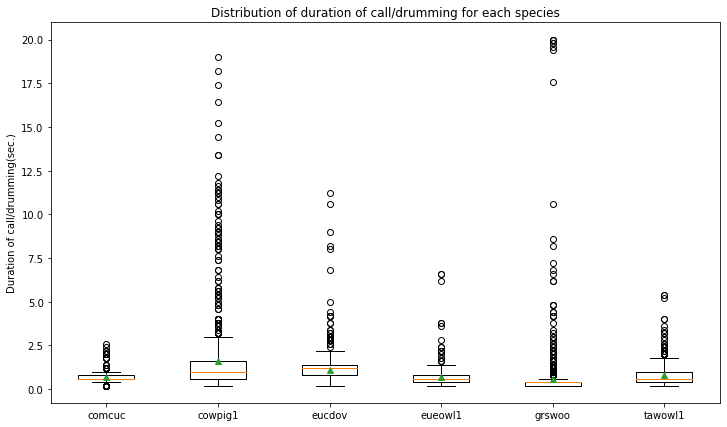

In [52]:
BirdsData('ptichki').species_call_distribution()


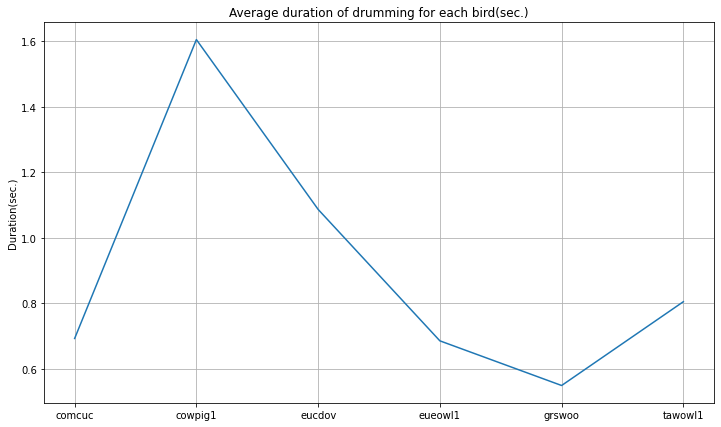

In [19]:
BirdsData('ptichki').plot_duration_means()


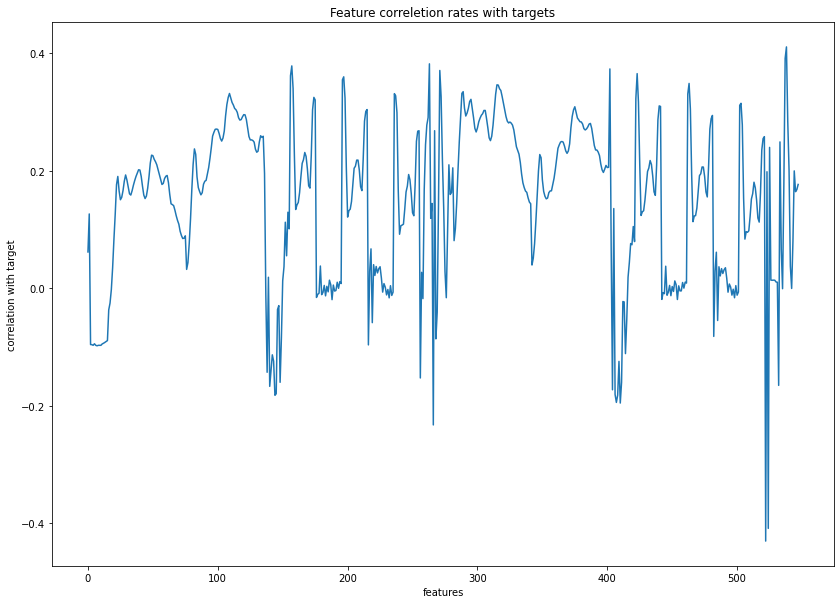

Index(['cln_contrast_mean_4', 'cln_contrast_mean_3', 'raw_energy_std',
       'raw_mfcc_std_1', 'cln_mfcc_mean_0', 'raw_contrast_mean_3',
       'cln_mfcc_std_1', 'raw_mfcc_std_0', 'raw_mfcc_d_std_1',
       'raw_mfcc_d_std_0'],
      dtype='object')
Top 10 features with largest correlations


In [21]:
print(BirdsData('ptichki').cor_feat_label())
print('Top 10 features with largest correlations')
